# 5. Multinomial NB and Tree with Tweet Text, Date and Like Count

**Author:** Tori Stiegman   
**Project:** Gender-Inclusive Language in Tweets about Menstruation: Capstone Edition                       
**Date turned in:** Dec 19, 2022                                                               
**Updated:** Mar 1, 2023

**About this notebook:** **About this notebook:** In this notebook I will train and test a new Naive Bayes classifier and a new decision Tree. It will be able to label tweets as gender- "inclusive," "exclusive," or "neither" based on more information including `date` and `like_count`. 

**Table of Contents**
1. [Import and Format Data](#data)
    1. [Make Test Set](#testSet)
    2. [Format Data](#format)
2. [Vectorize training set](#vector)
3. [Create a classifier instance](#classifier)
4. [Fit the classifier](#fit)
5. [Make predictions](#predict)
    1. [Test dataset](#test)
    2. [Full dataset](#full)

In [1]:
import pandas as pd

# get rid of warnings pls
import warnings
warnings.filterwarnings('ignore')

<a name="data"></a>
## Import and Format Data

Here I will import my training dataset, `train_clean_extras.csv`, and my test dataset, `test_clean_extras.csv`. Please note that these datasets are exactly the same as the data sets I used to train and test the first Naive Bayes model, excpet that they have two extra columsn: `date` and `like_count`.

I will then format my training data into lists that the model can be trained on. 

### Load in Training Set

In [35]:
pd.set_option('display.max_colwidth', -1)
labeled = pd.read_csv("train_clean_extras.csv")

In [36]:
# labeled.head(1)

In [37]:
labeled["label"].value_counts()

neither      143
exclusive    73 
inclusive    64 
Name: label, dtype: int64

<a name="testSet"></a>
### Load in Test Set


In [38]:
dfTestFull = pd.read_csv("test_clean_extras.csv")

In [39]:
dfTestFull["label"].value_counts()

neither      24
exclusive    16
inclusive    16
Name: label, dtype: int64

<a name="format"></a>
### Format data

`tweetText` = a list of tweet text data... will become a part of `X_train` once it is vectorized... 

`y_train` = a list of labels correlating to certain items in `X`

In [40]:
tweetText = labeled['text_clean'].tolist()

In [41]:
y_train = labeled['label'].tolist()

<a name="vector"></a>
### Preprocess and Vectorize Training Data

Here I will turn all of the tweets into a "bag of words." This vector will contain how many instances there are of each word in the dataset to create a full vocabulary. 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [43]:
vectorizer = CountVectorizer()
text_vectorized = vectorizer.fit_transform(tweetText).toarray()

In [44]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Convert date labels into numbers.
date_encoded = le.fit_transform(labeled['date'])

In [45]:
import numpy as np
from sklearn import preprocessing, naive_bayes, feature_extraction, pipeline, model_selection, compose

#Combining tweet text, date, and like_count into single list of 
X_train = np.column_stack((text_vectorized, date_encoded, labeled["like_count"]))

# X_train = np.column_stack((date_encoded, labeled["like_count"]))

<a name="vector"></a>
### Preprocess and Vectorize Test Data

Here I will turn all of the tweets in the test dataset into a "bag of words." This vector will contain how many instances there are of each word in the dataset to create a full vocabulary. 

In [46]:
test1 = dfTestFull['text_clean'].fillna(' ').tolist()
text_vec_test = vectorizer.transform(test1).toarray()

# Convert date labels into numbers.
date_encoded_test = le.fit_transform(dfTestFull['date'])

#Combining tweet text, date, and like_count into single list of 
X_test = np.column_stack((text_vec_test, date_encoded_test, dfTestFull["like_count"]))
# X_test = np.column_stack((date_encoded_test, dfTestFull["like_count"]))

y_test = dfTestFull.label.values.tolist()

________________________

<a name="classifier"></a>
## Create and Fit Multinomial Naive Bayes Classifier Instance

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
# create classifier instance
classifier = MultinomialNB()

In [49]:
# fit the classifier on the training data
classifier.fit(X_train, y_train)

MultinomialNB()

### What is the classifier doing?

In [50]:
# show the class names that it has learned
classifier.classes_

array(['exclusive', 'inclusive', 'neither'], dtype='<U9')

In [51]:
# show how many instances for each class
classifier.class_count_

array([ 73.,  64., 143.])

In [52]:
# show total number of features for each class
classifier.feature_count_

array([[0.0000e+00, 2.0000e+00, 0.0000e+00, ..., 0.0000e+00, 9.2100e+03,
        3.3500e+02],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 6.6520e+03,
        4.5000e+02],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.5797e+04,
        9.5500e+02]])

In [53]:
# show the conditional log probabilities for each feature
classifier.feature_log_prob_

array([[-9.44817547, -8.34956318, -9.44817547, ..., -9.44817547,
        -0.32002177, -3.63106431],
       [-9.21771313, -8.52456595, -9.21771313, ..., -8.52456595,
        -0.41488997, -3.10624579],
       [-9.24014186, -9.93328904, -9.24014186, ..., -9.93328904,
        -0.26565042, -3.07053113]])

### Predict Labels for Test Set

In [54]:
y_pred = classifier.predict(X_test)

dfTestFull['predicted_label'] = y_pred

y_test = dfTestFull.label.values.tolist()

### Calculate Accuracy, Sensitivity and Specificity from Confusion Matrix

#### Confusion Matrix
First, I'll create a confusion matrix:

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
cmNB = confusion_matrix(
        y_test, y_pred, labels = ['exclusive', 'inclusive', 'neither'])
print("Confusion Matrix:\n" + str(cmNB))

Confusion Matrix:
[[ 7  7  2]
 [ 1 11  4]
 [ 1  2 21]]


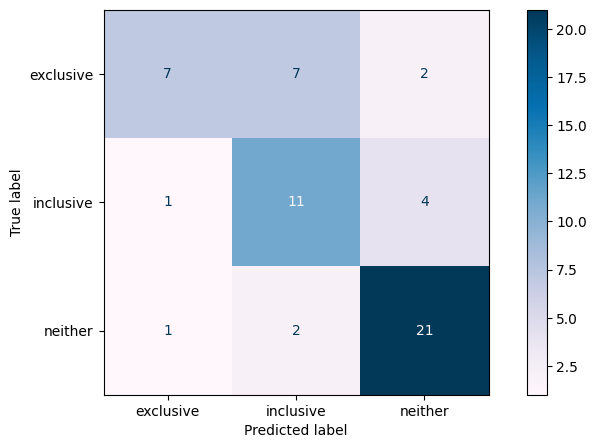

In [84]:
# a nicer version of the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cmNB,
                              display_labels=['exclusive', 'inclusive', 'neither'])
disp_tree.plot(cmap = 'PuBu')

#### Accuracy

Next I'll calculate the accuracy.

> accuracy = total correct predictions / total predictions

In [58]:
acc_score_tree = accuracy_score(y_test, y_pred)
print("Accuracy Score: " + str(acc_score_tree))

Accuracy Score: 0.6964285714285714


#### Sensitivity

> sensitivity = (true positives)/(true positives + false negatives)

In [59]:
# Define a helper function 

def sensitivity(tp, fn, label):
    print(label + " Sensitivity: " + str(tp/(tp+fn)))

In [61]:
# Define the true positive and true negative values for each label

# exclusive
tp_ex_nb = cmNB[0][0] # should be 12
fn_ex_nb = cmNB[0][1] + cmNB[0][2]

# inclusive
tp_in_nb = cmNB[1][1]
fn_in_nb = cmNB[1][0] + cmNB[1][2]

# neither
tp_ne_nb = cmNB[2][2]
fn_ne_nb = cmNB[2][0] + cmNB[2][1]

In [62]:
sensitivity(tp_ex_nb, fn_ex_nb, "'Exclusive'")
sensitivity(tp_in_nb, fn_in_nb, "'Inclusive'")
sensitivity(tp_ne_nb, fn_ne_nb, "'Neither'")

'Exclusive' Sensitivity: 0.4375
'Inclusive' Sensitivity: 0.6875
'Neither' Sensitivity: 0.875


Based on this Confusion Matrix, the sensitivity, or true positive rate, was the highest for the "neither" category (0.875), and the lowest for the "exclusive" category (0.438). This means this tree model based on the text of the tweets identified 87.5% of the "Neither" cases in the test data set, 43.8% of the "exclusive cases" and 68.8% of the "Inclusive" cases. 

#### Specificity

> specificity = tn / (tn + fp)

In [63]:
# Define a helper function

def specificity(tn, fp, label):
    print(label + " Sensitivity: " + str(tn/(tn+fp)))

In [64]:
# Define the true negative and false positive values for each label

# exclusive
tn_ex_nb = sum(cmNB[1] + cmNB[2])
fp_ex_nb = cmNB[1][0] + cmNB[2][0]

# inclusive
tn_in_nb = sum(cmNB[0] + cmNB[2])
fp_in_nb = cmNB[0][1] + cmNB[2][1] 

# neither
tn_ne_nb = sum(cmNB[0] + cmNB[1])
fp_ne_nb = cmNB[0][2] + cmNB[1][2]

In [65]:
specificity(tn_ex_nb, fp_ex_nb, "'Exclusive'")
specificity(tn_in_nb, fp_in_nb, "'Inclusive'")
specificity(tn_ne_nb, fp_ne_nb, "'Neither'")

'Exclusive' Sensitivity: 0.9523809523809523
'Inclusive' Sensitivity: 0.8163265306122449
'Neither' Sensitivity: 0.8421052631578947


The specificity of this tree model based on the tweet text was very high for the "exclusive" category (0.95) and moderately high for the "inclusive" (0.82) category the "neither" (0.84) categroy. This means this decision tree was able to identify 95% of the tweets that did _not_ contain exclusive language, 82% of the tweets that did _not_ contain inclusive language and 84% of the tweets that did contain either exclusive or inclusive langague (i.e. did not contain words that would have earned it a "neither" label). 

-------------------------------------------------

## Decision Tree with Tweet Text

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [69]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 50, 
                             random_state = 0)

# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
y_pred_tree = clf.predict(X_test)

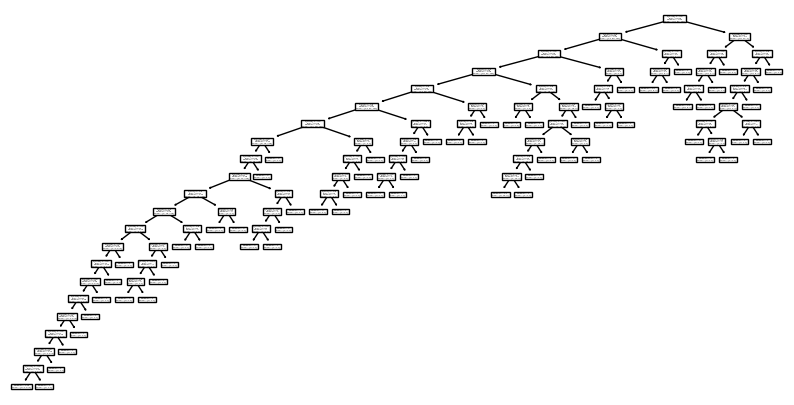

In [70]:
plt.rcParams['figure.figsize'] = [10, 5]
fig = clf.fit(X_train,y_train)
tree.plot_tree(fig)
plt.show()

### Calculate Accuracy, Sensitivity and Specificity from Confusion matrix

#### Confusion Matrix
First, I'll create a confusion matrix:

In [71]:
cmTree = confusion_matrix(
        y_test, y_pred_tree, labels = ['exclusive', 'inclusive', 'neither'])
print("Confusion Matrix:\n" + str(cmTree))

Confusion Matrix:
[[10  4  2]
 [ 0  9  7]
 [ 0  2 22]]


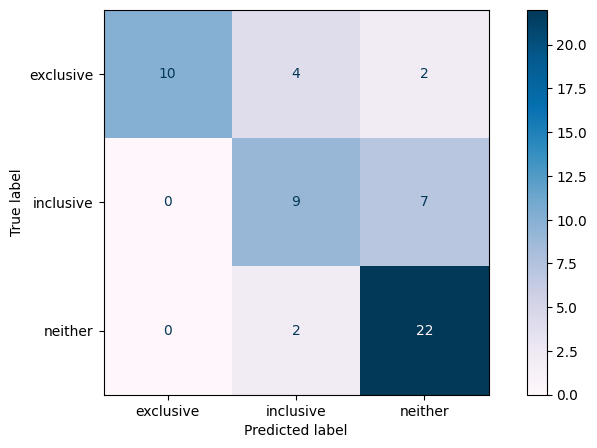

In [85]:
# a nicer version of the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cmTree,
                              display_labels=['exclusive', 'inclusive', 'neither'])
disp_tree.plot(cmap = 'PuBu')

#### Accuracy

Next I'll calculate the accuracy.

> accuracy = total correct predictions / total predictions

In [73]:
acc_score_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score: " + str(acc_score_tree))

Accuracy Score: 0.7321428571428571


#### Sensitivity

> sensitivity = (true positives)/(true positives + false negatives)

In [74]:
# Define a helper function 

def sensitivity(tp, fn, label):
    print(label + " Sensitivity: " + str(tp/(tp+fn)))

In [75]:
# Define the true positive and true negative values for each label

# exclusive
tp_ex_tree = cmTree[0][0] # should be 12
fn_ex_tree = cmTree[0][1] + cmTree[0][2]

# inclusive
tp_in_tree = cmTree[1][1]
fn_in_tree = cmTree[1][0] + cmTree[1][2]

# neither
tp_ne_tree = cmTree[2][2]
fn_ne_tree = cmTree[2][0] + cmTree[2][1]

In [76]:
sensitivity(tp_ex_tree, fn_ex_tree, "'Exclusive'")
sensitivity(tp_in_tree, fn_in_tree, "'Inclusive'")
sensitivity(tp_ne_tree, fn_ne_tree, "'Neither'")

'Exclusive' Sensitivity: 0.625
'Inclusive' Sensitivity: 0.5625
'Neither' Sensitivity: 0.9166666666666666


Based on this Confusion Matrix, the sensitivity, or true positive rate, was the highest for the "neither" category (0.917), and the lowest for the "inclusive" category (0.5625). This means this tree model based on the text of the tweets identified 91.7% of the "Neither" cases in the test data set, 62.5% of the "exclusive cases" and 56.25% of the "Inclusive" cases. 

#### Specificity

> specificity = tn / (tn + fp)

In [77]:
# Define a helper function

def specificity(tn, fp, label):
    print(label + " Sensitivity: " + str(tn/(tn+fp)))

In [78]:
# Define the true negative and false positive values for each label

# exclusive
tn_ex_tree = sum(cmTree[1] + cmTree[2])
fp_ex_tree = cmTree[1][0] + cmTree[2][0]

# inclusive
tn_in_tree = sum(cmTree[0] + cmTree[2])
fp_in_tree = cmTree[0][1] + cmTree[2][1] 

# neither
tn_ne_tree = sum(cmTree[0] + cmTree[1])
fp_ne_tree = cmTree[0][2] + cmTree[1][2]

In [79]:
specificity(tn_ex_tree, fp_ex_tree, "'Exclusive'")
specificity(tn_in_tree, fp_in_tree, "'Inclusive'")
specificity(tn_ne_tree, fp_ne_tree, "'Neither'")

'Exclusive' Sensitivity: 1.0
'Inclusive' Sensitivity: 0.8695652173913043
'Neither' Sensitivity: 0.7804878048780488


The specificity of this tree model based on the tweet text was very high for the "exclusive" category (1.0) and moderately high for the "inclusive" (0.87) category and the "neither" (0.78) categroy. This means this decision tree was able to identify 100% of the tweets that did _not_ contain exclusive language, 87% of the tweets that did _not_ contain inclusive language and 78% of the tweets that did contain either exclusive or inclusive langague (i.e. did not contain words that would have earned it a "neither" label). 